In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # statistical plotting library
import pylab as p
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable


In [4]:
characters_df=pd.read_csv('character.csv')
weapons_df=pd.read_csv('weapons.csv')

In [5]:
characters_df

,Character Name,Gender,Age,Survival Ability,Level 1,Level 2,Level 3,Level 4,Level 5,Level 6,Level 7,Level 8
0,Andrew,M,42,Armor Specialist,decreased by 2%,decreased by 4%,decreased by 6%,decreased by 8%,Suit.,decreased by 10%,Bannaer,decreased by 12%
1,A124,F,18,Thrill of Battle,"EP into HP, CD: 90s","EP into HP, CD: 80s","EP into HP, CD: 75s","EP into HP, CD: 70s",Suit,"EP into HP, CD: 65s",Bannaer,"EP into HP, CD: 60s"
2,Rafael,M,31,Dead Silent,"ot be revealed on the mini-map for 8s, CD 90s","ot be revealed on the mini-map for 8s, CD 80s","ot be revealed on the mini-map for 8s, CD 70s","ot be revealed on the mini-map for 8s, CD 60s",Suit,"ot be revealed on the mini-map for 8s, CD 50s",Bannaer,"ot be revealed on the mini-map for 8s, CD 40s"
3,Laura,F,24,Sharp Shooter,Accuracy increase 10%-Scope in,Accuracy increase 14%-Scope in,Accuracy increase 18%-Scope in,Accuracy increase 22%-Scope in,Suit,Accuracy increase 28%-Scope in,Bannaer,Accuracy increase 30%-Scope in
4,Shimada Hayato,M,20,Bushido,"HP is decrease 10%,increase 7.5% armor penetra...","HP is decrease 10%,increase 8% armor penetration","HP is decrease 10%,increase 8.5% armor penetra...","HP is decrease 10%,increase 9% armor penetration",Suit,"HP is decrease 10%,increase 9.5% armor penetra...",Bannaer,"HP is decrease 10%,increase 10% armor penetration"
5,Moco,F,20,Hacker's Eye,Tag enemies shot for 2 seconds.,Tag enemies shot for 2.5 seconds.,Tag enemies shot for 3 seconds.,Tag enemies shot for 3.5 seconds.,Suit,Tag enemies shot for 4 seconds.,Bannaer,Tag enemies shot for 5 seconds.
6,Wukong,Unknown,Unknown,Camouflage,cool down is 300 seconds,cool down is 280 seconds,cool down is 260 seconds,cool down is 240 seconds,Suit,cool down is 220 seconds,Bannaer,cool down is 200 seconds
7,Antonio,Unknown,30,Gangster's Spirit,Receive 10 extra HP when the round starts,Receive 15 extra HP when the round starts,Receive 20 extra HP when the round starts,Receive 25 extra HP when the round starts,Suit,Receive 30 extra HP when the round starts,Bannaer,Receive 35 extra HP when the round starts
8,Caroline,F,17,Agility,shotgun movement speed is increased by 3%,shotgun movement speed is increased by 4%,shotgun movement speed is increased by 5%,shotgun movement speed is increased by 6%,Suit,shotgun movement speed is increased by 7%,Bannaer,shotgun movement speed is increased by 8%
9,Miguel,M,26,Crazy Slayer,Gain 20 EP for each kill,Gain 25 EP for each kill,Gain 30 EP for each kill,Gain 35 EP for each kill,Suit,Gain 40 EP for each kill,Bannaer,Gain 45 EP for each kill


In [6]:
weapons_df

,Weapon_Name,Weapon_type,DAMAGE,RATE_OF_FIRE,RANGE,RELOAD SPEED,MAGAZINE,ACCURACY,MOVEMENT_SPEED,ARMOR_PENETRATION,ATTACHABLES
0,RGS50,LAUNCHER,90,27,100,62,3,90,65,0,Nothing
1,MGL140,LAUNCHER,90,33,51,76,5,90,65,0,MAGAZINE
2,M79,LAUNCHER,90,27,51,62,1,90,65,0,Nothing
3,GATLING,LMG,55,56,84,62,1200,79,32,0,Nothing
4,M249,LMG,57,59,77,48,100,56,58,0,Nothing
5,CG15,SMG,50,69,71,62,20,60,63,0,"FOREGRIP,MAGAZINE"
6,P90,SMG,48,75,27,48,50,37,63,0,"MAGAZINE,SCOPE,STOCK"
7,MP40,SMG,48,83,22,48,20,17,63,0,"STOCK,MAGAZINE"
8,UMP,SMG,49,75,36,77,48,36,79,63,"SILENCER,MUZZLE,FOREGRIP,MAGAZINE,SCOPE"
9,MP5,SMG,48,76,41,77,48,54,66,0,"SILENCER,MUZZLE,FOREGRIP,MAGAZINE,SCOPE"


In [7]:
characters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Character Name    28 non-null     object
 1   Gender            28 non-null     object
 2   Age               28 non-null     object
 3   Survival Ability  28 non-null     object
 4   Level 1           28 non-null     object
 5   Level 2           28 non-null     object
 6   Level 3           28 non-null     object
 7   Level 4           28 non-null     object
 8   Level 5           28 non-null     object
 9   Level 6           28 non-null     object
 10  Level 7           28 non-null     object
 11  Level 8           28 non-null     object
dtypes: object(12)
memory usage: 2.8+ KB


In [8]:
characters_df.shape

(28, 12)

In [9]:
weapons_df.shape


(44, 11)

In [10]:
characters_df.describe()

,Character Name,Gender,Age,Survival Ability,Level 1,Level 2,Level 3,Level 4,Level 5,Level 6,Level 7,Level 8
count,28,28,28,28,28,28,28,28,28,28,28,28
unique,28,3,17,28,28,28,28,28,3,28,1,28
top,Andrew,F,31,Armor Specialist,decreased by 2%,decreased by 4%,decreased by 6%,decreased by 8%,Suit,decreased by 10%,Bannaer,decreased by 12%
freq,1,14,3,1,1,1,1,1,19,1,28,1


In [11]:
characters_df.isnull().sum()

Character Name      0
Gender              0
Age                 0
Survival Ability    0
Level 1             0
Level 2             0
Level 3             0
Level 4             0
Level 5             0
Level 6             0
Level 7             0
Level 8             0
dtype: int64

In [12]:
weapons_df.isnull().sum()

Weapon_Name          0
Weapon_type          0
DAMAGE               0
RATE_OF_FIRE         0
RANGE                0
RELOAD SPEED         0
MAGAZINE             0
ACCURACY             0
MOVEMENT_SPEED       0
ARMOR_PENETRATION    0
ATTACHABLES          0
dtype: int64

In [13]:
characters_df.isnull().sum()*100/len(characters_df)

Character Name      0.0
Gender              0.0
Age                 0.0
Survival Ability    0.0
Level 1             0.0
Level 2             0.0
Level 3             0.0
Level 4             0.0
Level 5             0.0
Level 6             0.0
Level 7             0.0
Level 8             0.0
dtype: float64

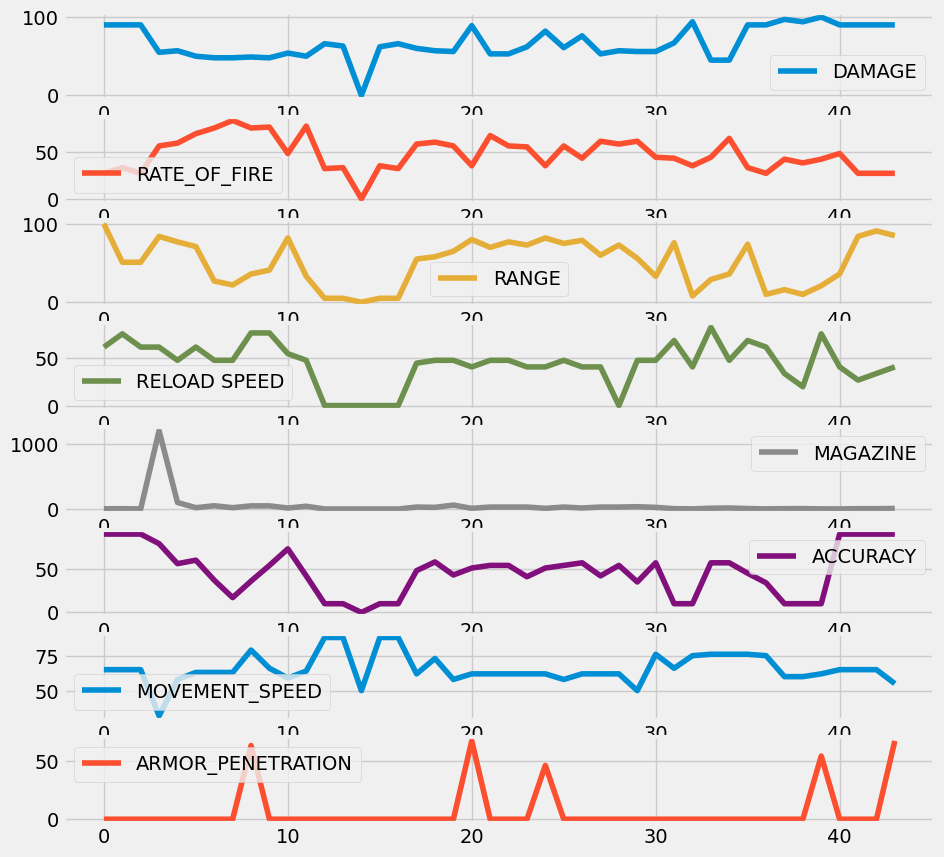

In [14]:
weapons_df.plot(subplots=True, figsize=(10, 10), sharex=False, sharey=False)
plt.show()

<Axes: >

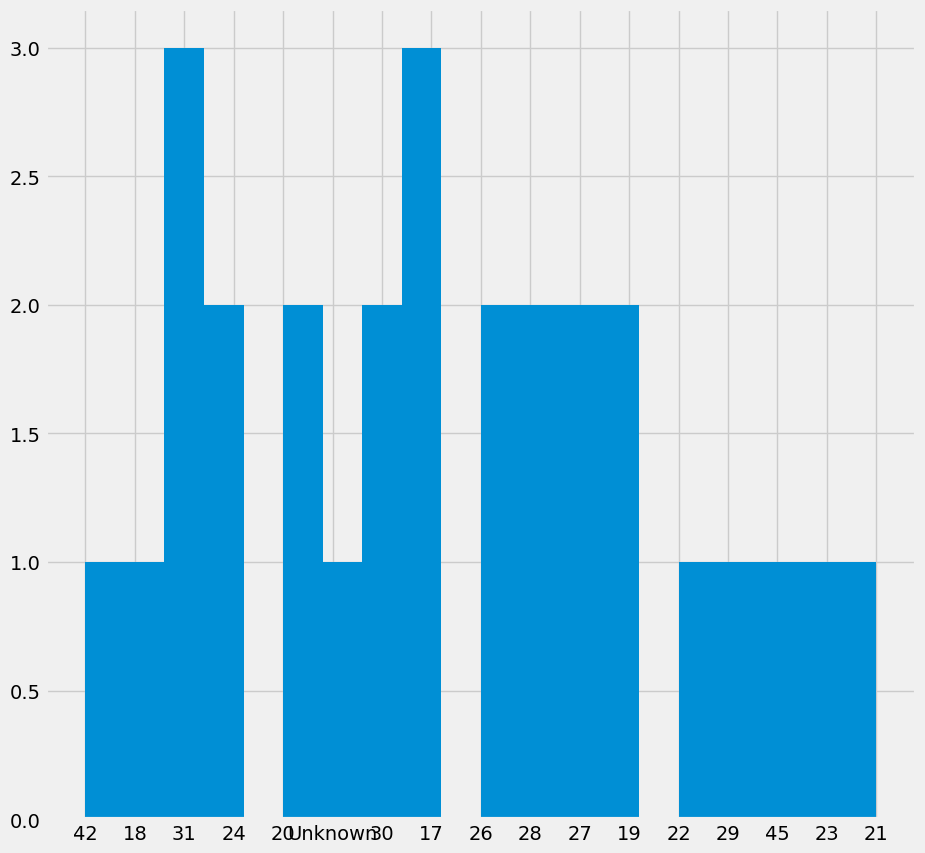

In [15]:
characters_df['Age'].hist(figsize=(10,10), bins=20)

<Axes: >

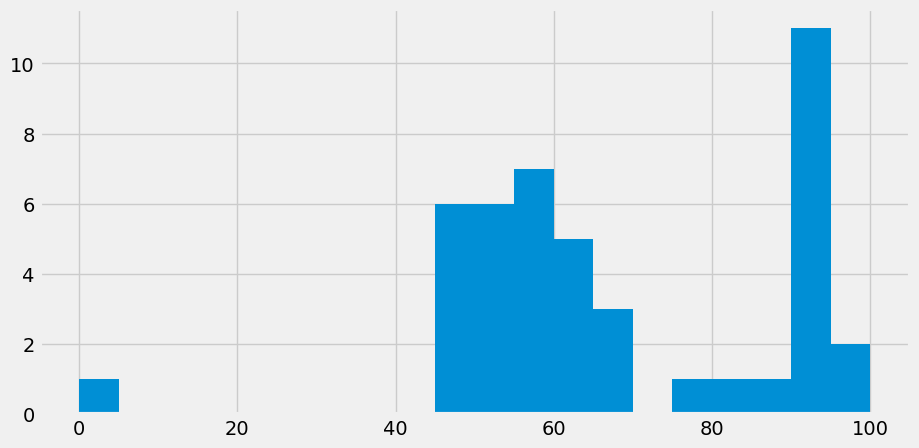

In [16]:
weapons_df['DAMAGE'].hist(figsize=(10,5), bins=20)   

<Axes: >

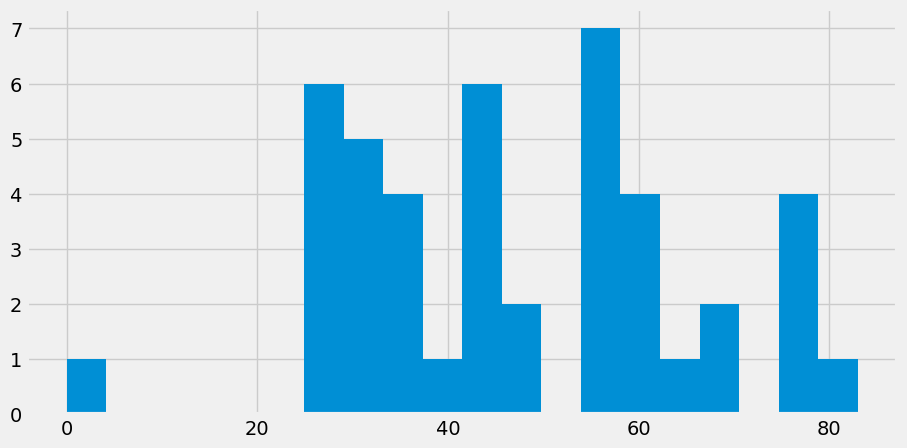

In [17]:
weapons_df['RATE_OF_FIRE'].hist(figsize=(10,5), bins=20)

C:\Users\dell\AppData\Local\Temp\ipykernel_14072\3435057601.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weapons_df.corr(),annot=True,cmap='magma')


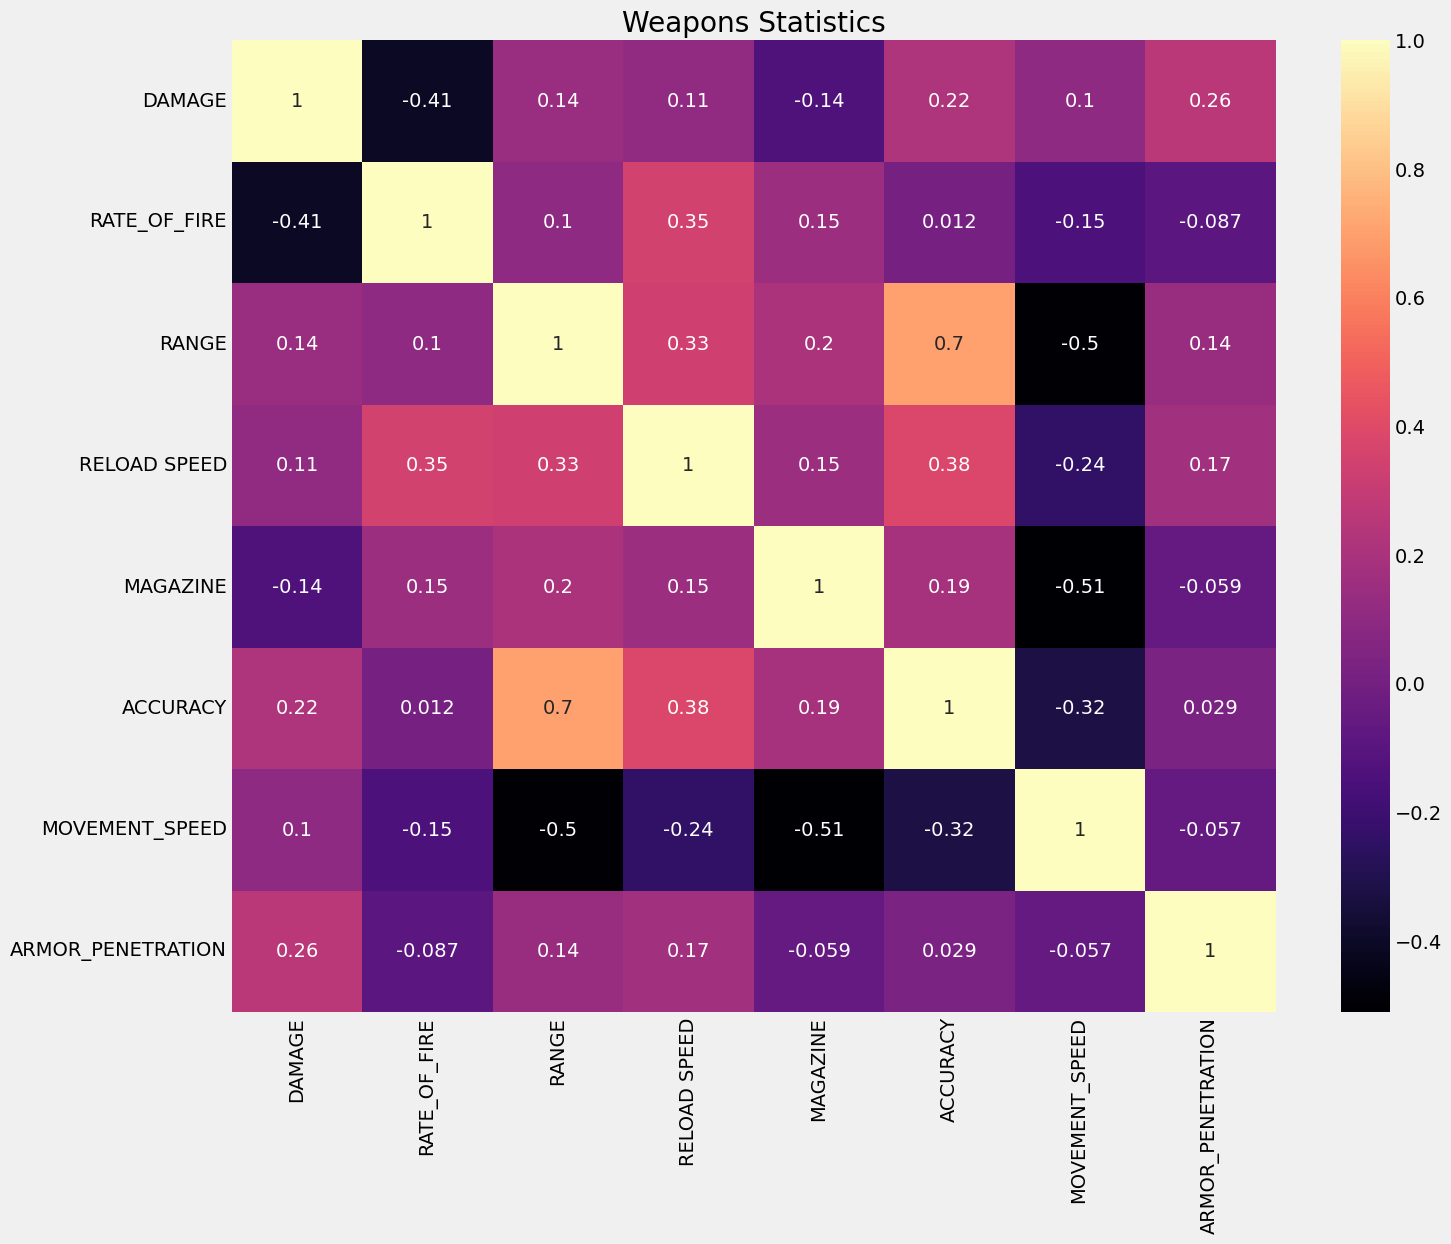

In [18]:
plt.rcParams['figure.figsize']=(15,12)
sns.heatmap(weapons_df.corr(),annot=True,cmap='magma')
plt.title('Weapons Statistics')
plt.show()

In [19]:
weapons_df.iloc[:,2:10]

,DAMAGE,RATE_OF_FIRE,RANGE,RELOAD SPEED,MAGAZINE,ACCURACY,MOVEMENT_SPEED,ARMOR_PENETRATION
0,90,27,100,62,3,90,65,0
1,90,33,51,76,5,90,65,0
2,90,27,51,62,1,90,65,0
3,55,56,84,62,1200,79,32,0
4,57,59,77,48,100,56,58,0
5,50,69,71,62,20,60,63,0
6,48,75,27,48,50,37,63,0
7,48,83,22,48,20,17,63,0
8,49,75,36,77,48,36,79,63
9,48,76,41,77,48,54,66,0


In [20]:
w_df=weapons_df.iloc[:,2:10]
w_df

,DAMAGE,RATE_OF_FIRE,RANGE,RELOAD SPEED,MAGAZINE,ACCURACY,MOVEMENT_SPEED,ARMOR_PENETRATION
0,90,27,100,62,3,90,65,0
1,90,33,51,76,5,90,65,0
2,90,27,51,62,1,90,65,0
3,55,56,84,62,1200,79,32,0
4,57,59,77,48,100,56,58,0
5,50,69,71,62,20,60,63,0
6,48,75,27,48,50,37,63,0
7,48,83,22,48,20,17,63,0
8,49,75,36,77,48,36,79,63
9,48,76,41,77,48,54,66,0


In [21]:
def norm_func(i):
     x = (i - i.min()) / (i.max() - i.min())
     return (x)

In [22]:
w_df.iloc[ :, 0:8]

,DAMAGE,RATE_OF_FIRE,RANGE,RELOAD SPEED,MAGAZINE,ACCURACY,MOVEMENT_SPEED,ARMOR_PENETRATION
0,90,27,100,62,3,90,65,0
1,90,33,51,76,5,90,65,0
2,90,27,51,62,1,90,65,0
3,55,56,84,62,1200,79,32,0
4,57,59,77,48,100,56,58,0
5,50,69,71,62,20,60,63,0
6,48,75,27,48,50,37,63,0
7,48,83,22,48,20,17,63,0
8,49,75,36,77,48,36,79,63
9,48,76,41,77,48,54,66,0


In [23]:
predictors = w_df.iloc[ :, 0:8]
target = w_df.iloc[ :, 7]
predictors1 = norm_func(predictors)
predictors1

,DAMAGE,RATE_OF_FIRE,RANGE,RELOAD SPEED,MAGAZINE,ACCURACY,MOVEMENT_SPEED,ARMOR_PENETRATION
0,0.90,0.325301,1.00,0.746988,0.002500,1.000000,0.589286,0.000000
1,0.90,0.397590,0.51,0.915663,0.004167,1.000000,0.589286,0.000000
2,0.90,0.325301,0.51,0.746988,0.000833,1.000000,0.589286,0.000000
3,0.55,0.674699,0.84,0.746988,1.000000,0.877778,0.000000,0.000000
4,0.57,0.710843,0.77,0.578313,0.083333,0.622222,0.464286,0.000000
5,0.50,0.831325,0.71,0.746988,0.016667,0.666667,0.553571,0.000000
6,0.48,0.903614,0.27,0.578313,0.041667,0.411111,0.553571,0.000000
7,0.48,1.000000,0.22,0.578313,0.016667,0.188889,0.553571,0.000000
8,0.49,0.903614,0.36,0.927711,0.040000,0.400000,0.839286,0.940299
9,0.48,0.915663,0.41,0.927711,0.040000,0.600000,0.607143,0.000000


In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)
pca_values = pca.fit_transform(predictors1)
pca_values

array([[-6.66623654e-01, -1.62248227e-02, -3.58834238e-01,
        -2.13122023e-01,  1.41138224e-02,  9.74236921e-02,
         1.26393644e-01,  4.82289184e-02],
       [-4.38884635e-01, -2.42076941e-03, -1.23885607e-01,
        -4.62208152e-01,  1.01593122e-01, -1.69557084e-01,
         3.12173155e-02, -8.01820869e-02],
       [-3.67806801e-01,  1.53818415e-02, -2.66787654e-01,
        -3.77322917e-01,  8.48953386e-02, -1.86414814e-01,
         2.07186677e-02, -8.45726506e-02],
       [-7.26164966e-01, -4.05422905e-01,  1.34352718e-01,
         4.18589170e-01,  6.42175952e-01, -3.31321507e-01,
        -2.62597023e-01,  3.65198802e-01],
       [-2.65290089e-01, -2.11752545e-01,  4.11119009e-02,
         1.42237210e-01, -2.03901259e-02,  8.56177132e-02,
         6.98972327e-03, -3.20040783e-03],
       [-2.94969806e-01, -2.51049986e-01,  2.18069308e-01,
         1.14862729e-02, -1.31749169e-01,  4.72121238e-02,
         3.71984854e-02, -1.85444532e-02],
       [ 1.87894792e-01, -2.263351

In [25]:
var = pca.explained_variance_ratio_
var


array([0.38526255, 0.18644792, 0.14985334, 0.10308451, 0.06443688,
       0.04891435, 0.03833207, 0.02366838])

In [26]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 38.53,  57.17,  72.16,  82.47,  88.91,  93.8 ,  97.63, 100.  ])

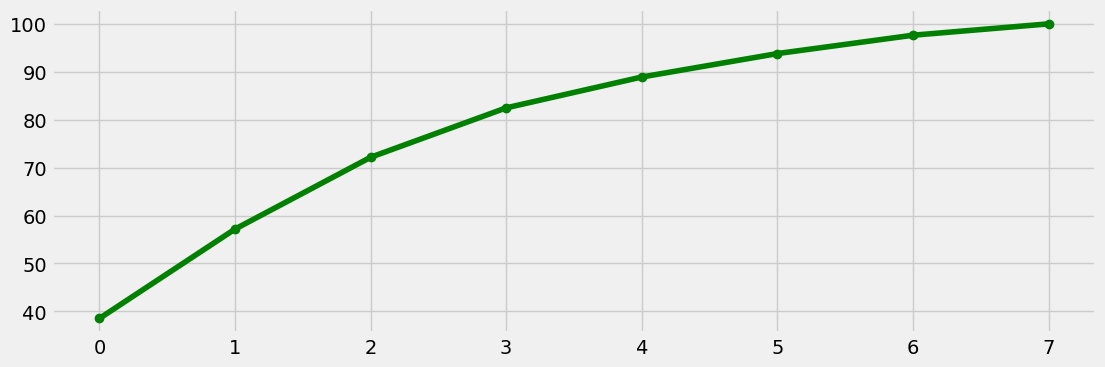

In [27]:
plt.figure(figsize=(12,4))
plt.plot(var1,color="green",marker = "o");

In [28]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [29]:
from sklearn.model_selection import train_test_split
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

X_train, X_test, y_train, y_test= train_test_split(predictors1, target, test_size = 0.2)

In [30]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Dense(5000, activation='relu', input_dim=8))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(1, kernel_initializer='uniform'))
model.compile(loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Nadam(
        learning_rate=0.0005,
        beta_1=0.8,
        beta_2=0.999),metrics=["mse"])

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=20,
    mode='auto',
    restore_best_weights=True)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=10,
    verbose=1,
    mode='auto',
    min_delta=0.0005,
    cooldown=0,
    min_lr=1e-6)

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.fit(x=X_train,y=y_train,batch_size=32,epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 248.3708 - mse: 248.3708
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 238.7085 - mse: 238.7085
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 232.9750 - mse: 232.9750
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 230.7020 - mse: 230.7020
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 229.5841 - mse: 229.5841
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 228.3510 - mse: 228.3510
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 226.4562 - mse: 226.4562
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 225.3297 - mse: 225.3297
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 224.2369 - mse: 224.2369
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 223.3518 - mse: 223.3518
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 181.6626 - mse: 181.6626
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 221.6942 - mse: 221.6942
E

In [32]:
eval_score_test = model.evaluate(X_test,y_test,verbose = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - loss: 10.3586 - mse: 10.3586


In [33]:
print ("Accuracy: %.3f%%" %(eval_score_test[1]*100))

Accuracy: 1035.863%


In [34]:
eval_score_train = model.evaluate(X_train,y_train,verbose=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.6559 - mse: 9.6559


In [35]:
print ("Accuracy: %.3f%%" %(eval_score_train[1]*100))

Accuracy: 962.502%


In [36]:
from sklearn import metrics
y_pred=model.predict(X_test)
result = metrics.r2_score(y_test, y_pred)
print(f'R2-score in test set: {np.round(result, 4)}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
R2-score in test set: 0.9855


In [37]:
df_pred = pd.DataFrame(y_pred, columns =['y_pred'])

pred_y= df_pred.iloc[:,0]
pred_y

0    -3.239325
1    -2.352145
2    64.882866
3    -3.680376
4    -3.425727
5    56.884148
6    -2.765347
7    -4.344872
8    49.549015
Name: y_pred, dtype: float32